In [1]:
# Imports
import contextily as cx
import geopandas as gpd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data into dataframes
bz = pd.read_csv("data/boligzonen.csv")
bs = pd.read_csv("data/boligsiden.csv")

In [3]:
# Convert dataframes into geodataframes
CRS = "EPSG:4326"
gbz = gpd.GeoDataFrame(bz, geometry=gpd.points_from_xy(bz.longitude, bz.latitude), crs=CRS)
gbs = gpd.GeoDataFrame(bs, geometry=gpd.points_from_xy(bs.longitude, bs.latitude), crs=CRS)

## Location of Boligzonen and Boligsiden apartments

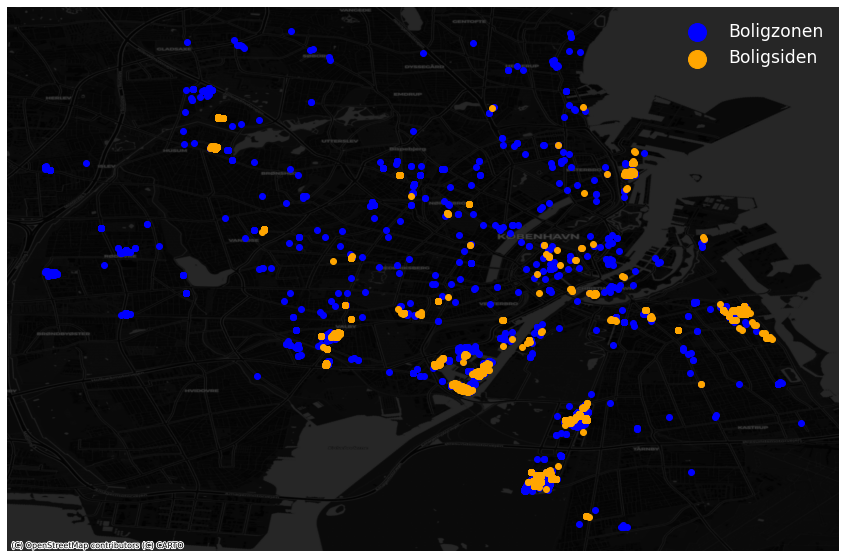

In [4]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plot boligzonen and boligsiden apartments
gbz.plot(ax=ax, color='blue')
gbs.plot(ax=ax, color='orange')

# Add legend
ax.legend(['Boligzonen', 'Boligsiden'], loc='upper right', markerscale=3.0, fontsize='xx-large', labelcolor='white', frameon=False)

# Set limit on latitude (cut out the airport)
ax.set_ylim(55.600, 55.750)

# Remove longitude and latitude
ax.set_axis_off()

# Add the basemap using contextily
cx.add_basemap(ax, crs=CRS, source=cx.providers.CartoDB.DarkMatter, alpha=1)

# Save plot
# plt.savefig(f"plots/apartments.png", dpi=600)
# plt.close()

## Clusters of Boligsiden apartments

In [5]:
# Obtain number of apartments in the same location defined by (latitude, longitude) pair
bs['stacked'] = bs['id'].groupby([bs.longitude, bs.latitude]).transform('count')

# Obtain average norm_rent for given location defined by (latitude, longitude) pair
bs['mean_norm_rent'] = bs['norm_rent'].groupby([bs.longitude, bs.latitude]).transform('mean')
bs.head()

,id,rooms,area,rent,norm_rent,latitude,longitude,geometry,stacked,mean_norm_rent
0,KK-FA076(2521),5.0,118.0,17907,151.75,55.621580,12.572253,POINT (12.57225 55.62158),1,151.750
1,KK-FO021(2521),2.0,65.0,11419,175.68,55.621788,12.572034,POINT (12.57203 55.62179),2,186.655
2,199500004381995004,2.0,78.0,12000,153.85,55.632766,12.582294,POINT (12.58229 55.63277),1,153.850
3,11802696,4.0,142.0,23075,162.50,55.684372,12.571401,POINT (12.57140 55.68437),2,165.580
4,11802617,3.0,117.0,15500,132.48,55.662417,12.630089,POINT (12.63009 55.66242),1,132.480


In [6]:
# Create aggregate with average rent number of apartments in the same location defined by (latitude, longitude) pair
agg_bs = bs[['latitude', 'longitude', 'stacked', 'mean_norm_rent']]
agg_bs = agg_bs.drop_duplicates(subset=['latitude', 'longitude'])
agg_bs

,latitude,longitude,stacked,mean_norm_rent
0,55.621580,12.572253,1,151.750
1,55.621788,12.572034,2,186.655
2,55.632766,12.582294,1,153.850
3,55.684372,12.571401,2,165.580
4,55.662417,12.630089,1,132.480
...,...,...,...,...
2167,55.659913,12.515120,2,158.615
2198,55.712067,12.575319,1,226.320
2199,55.645845,12.547577,1,175.000
2217,55.710382,12.596426,1,186.050


In [7]:
# Create geodataframe from aggregated boligsiden apartments
gdf_agg_bs = gpd.GeoDataFrame(agg_bs, geometry=gpd.points_from_xy(agg_bs.longitude, agg_bs.latitude), crs=CRS)

### Sydhavn cluster

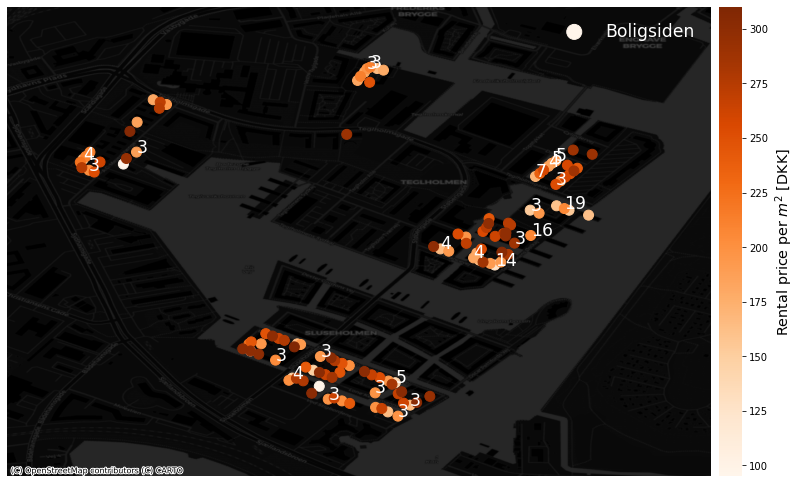

In [12]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plot boligzonen and boligsiden apartments
# gdf_agg_bs.plot(ax=ax, color='orange', alpha=1)
aps = gdf_agg_bs.plot(ax=ax, c=gdf_agg_bs.mean_norm_rent, cmap='Oranges', alpha=1, markersize=100)

# Create a ScalarMappable object
sm = cm.ScalarMappable(cmap='Oranges')
sm.set_array(gdf_agg_bs.mean_norm_rent)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=0.863, pad=0.01)
cbar.set_label('Rental price per $m^2$ [DKK]', fontsize='x-large', labelpad=5)
cbar.outline.set_visible(False)

# Add legend
ax.legend(['Boligsiden'], loc='upper right', markerscale=1.5, fontsize='xx-large', labelcolor='white', frameon=False)

# Set limit on longitude and latitude - isolate the cluster
ax.set_ylim(55.642, 55.656)
ax.set_xlim(12.539, 12.56)

# Remove longitude and latitude 
ax.set_axis_off()

# Display number of apartments in the same place
for i,j,v in zip(agg_bs.longitude, agg_bs.latitude, agg_bs.stacked):
    if v > 2: ax.annotate(v, xy=(i,j), color='white', fontsize='xx-large')

# Add the basemap using contextily
cx.add_basemap(ax, crs=CRS, source=cx.providers.CartoDB.DarkMatter, alpha=1)

# # Save plot
# plt.savefig(f"plots/cluster_sydhavn.png", dpi=600)
# plt.close()

### Nordhavn cluster

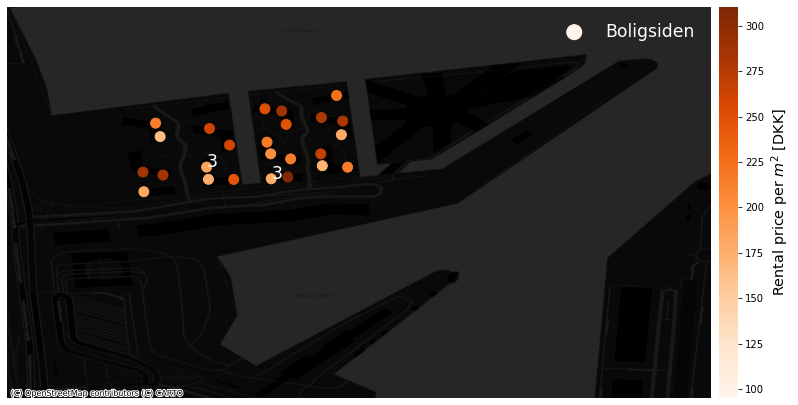

In [13]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plot boligzonen and boligsiden apartments
# gdf_agg_bs.plot(ax=ax, color='orange', alpha=1)
aps = gdf_agg_bs.plot(ax=ax, c=gdf_agg_bs.mean_norm_rent, cmap='Oranges', alpha=1, markersize=100)

# Create a ScalarMappable object
sm = cm.ScalarMappable(cmap='Oranges')
sm.set_array(gdf_agg_bs.mean_norm_rent)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=0.718, pad=0.01)
cbar.set_label('Rental price per $m^2$ [DKK]', fontsize='x-large', labelpad=5)
cbar.outline.set_visible(False)

# Add legend
ax.legend(['Boligsiden'], loc='upper right', markerscale=1.5, fontsize='xx-large', labelcolor='white', frameon=False)

# Set limit on longitude and latitude - isolate the cluster
ax.set_ylim(55.701, 55.706)
ax.set_xlim(12.592, 12.601)

# Remove longitude and latitude 
ax.set_axis_off()

# Display number of apartments in the same place
for i,j,v in zip(agg_bs.longitude, agg_bs.latitude, agg_bs.stacked):
    if v > 2: ax.annotate(v, xy=(i,j), color='white', fontsize='xx-large')

# Add the basemap using contextily
cx.add_basemap(ax, crs=CRS, source=cx.providers.CartoDB.DarkMatter, alpha=1)

# # Save plot
# plt.savefig(f"plots/cluster_nordhavn.png", dpi=600)
# plt.close()